#### Get data

In [59]:
#!pip install ucimlrepo

In [60]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

from ucimlrepo import fetch_ucirepo
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [61]:
# fetch dataset
haberman_s_survival = fetch_ucirepo(id=43)

# data (as pandas dataframes)
X = haberman_s_survival.data.features
y = haberman_s_survival.data.targets

# metadata
#print(haberman_s_survival.metadata)

# variable information
#print(haberman_s_survival.variables)

df = pd.DataFrame(X)
df['class'] = y

df.head()



,age,operation_year,positive_auxillary_nodes,class
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [62]:
df.describe()

,age,operation_year,positive_auxillary_nodes,class
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


As you can see, the variable class goes from 1 to 2, this is not a bad thing, however, in order to make less complexity math, it's a good practice to keep between 0 and 1. So let's change it

In [63]:
df['class'].replace({1: 0, 2: 1}, inplace=True)
df['class'].unique()

array([0, 1])

#### Quick EDA


In [64]:
fig = px.scatter_3d(df, x='age', y='operation_year', z='positive_auxillary_nodes', color='class')
fig.show()

In [65]:
fig = px.scatter_matrix(df, dimensions=df.columns[:-1], color='class')
fig.show()

**Pair Plot**

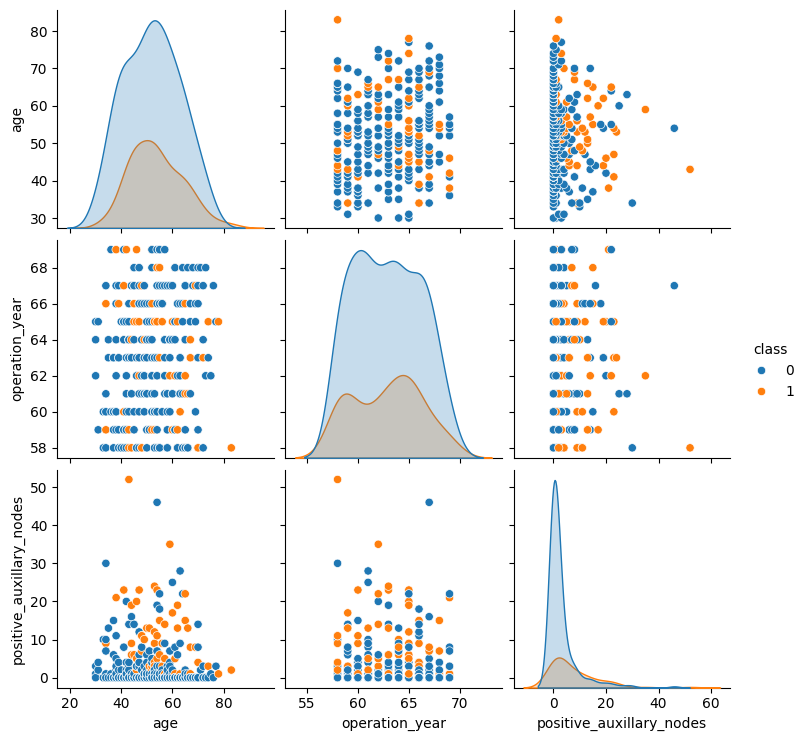

In [66]:
sns.pairplot(df, hue='class')
plt.show()

#### Model Training

We split 70 - 30 for train and test & Normalized data from 0 to 1

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Normalized the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


Train the model

In [68]:
perceptron = Perceptron(max_iter=1000, tol=1e-3, random_state=42)
perceptron.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Perceptron(random_state=42)

#### Performance & Metrics

In [69]:
y_pred = perceptron.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of perceptrón: {accuracy * 100:.2f}%')


Accuracy of perceptrón: 65.22%


Confusion Matrix

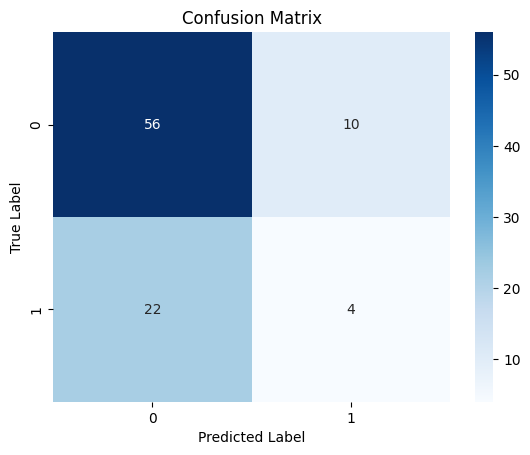

In [70]:
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()